<a href="https://colab.research.google.com/github/Atia6/LLM-practice/blob/main/CaptionGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [9]:
img_url = 'https://t2.gstatic.com/licensed-image?q=tbn:ANd9GcRoZC_JQAsW5rB_YteF6L0u0o94iMUKzkHxa8ibXSoB79pY8mNVv5BnbKehy7mZTEBS'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

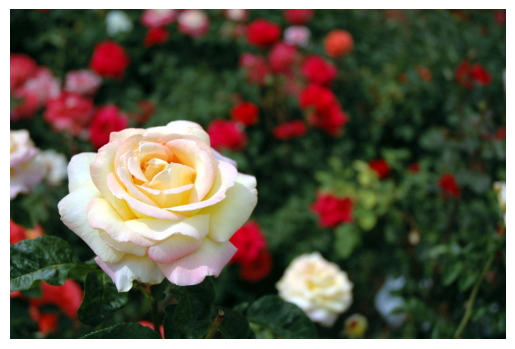

In [10]:
# Display the image
plt.imshow(raw_image)
plt.axis('off')  # Hide axes
plt.show()


In [11]:

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photography of a rose in a garden


In [12]:
# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a yellow rose in a field of red and white flowers
